<img src="images/Text_Analysis.jpeg" alt="Text Analysis" width="800"/>

# Text Analysis using Python

## Text Visualization

In [1]:
#execute "pip install wordcloud"

url = 'https://raw.githubusercontent.com/dearbharat/datasets/main/Course-Descriptions.txt'

! wget https://raw.githubusercontent.com/dearbharat/datasets/main/Course-Descriptions.txt -O ./data/course-descriptions.txt


#read the course descriptions
with open("data/course-descriptions.txt", 'r') as fh:  
    filedata = fh.read()

#check contents
print("File data sample : ", filedata[:200])

# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=25, \
                      background_color="white").generate(filedata)


--2023-02-23 23:56:23--  https://raw.githubusercontent.com/dearbharat/datasets/main/Course-Descriptions.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3657 (3.6K) [text/plain]
Saving to: './data/course-descriptions.txt'

./data/course-descr 100%[===================>]   3.57K  --.-KB/s    in 0s      

2023-02-23 23:56:23 (28.6 MB/s) - './data/course-descriptions.txt' saved [3657/3657]

File data sample :  In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. 
PHP is the most popular server-side language used to build dynamic we


ModuleNotFoundError: No module named 'wordcloud'

### Create Wordcloud

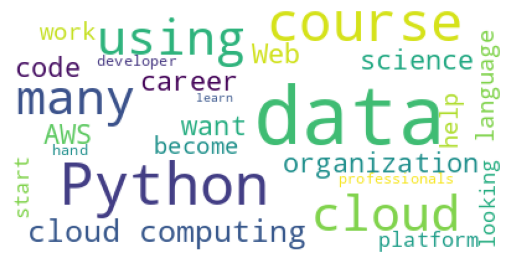

In [ ]:
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

### Enhance Wordcloud

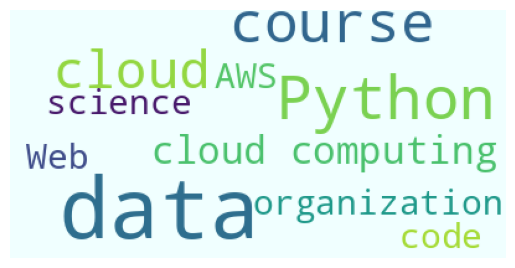

In [ ]:
#Add more words to ignore 
stopwords.update(["many","using", "want", "value"])

#Redo stop words. Limit number of words
wordcloud = WordCloud(stopwords=stopwords, max_words=10, \
                      background_color="azure").generate(filedata)

mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

## Sentiment Analysis

### Data Import

In [ ]:
#Import the movie reviews corpus

! wget https://raw.githubusercontent.com/dearbharat/datasets/main/Movie-Reviews.txt -O ./data/movie-reviews.txt

with open("data/movie-reviews.txt", 'r') as fh:  
    reviews = fh.readlines()
print(reviews[:2])

--2023-02-23 01:15:20--  https://raw.githubusercontent.com/dearbharat/datasets/main/Movie-Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1419 (1.4K) [text/plain]
Saving to: ‘./data/movie-reviews.txt’

./data/movie-review 100%[===================>]   1.39K  --.-KB/s    in 0s      

2023-02-23 01:15:20 (26.8 MB/s) - ‘./data/movie-reviews.txt’ saved [1419/1419]

['When your main character in a superhero movie is unwatchable, you already have a problem. In addition, Captain Marvel has no weaknesses, which kills the tension immediately.\n', 'Her performance was forced, uninspiring and flat! Not looking forward to the next movie with "her" in it....\n']


### Sentiments by Reviews

In [ ]:
#install textblob using "pip install -U textblob"
from textblob import TextBlob

print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )

for review in reviews:
    #Find sentiment of a review
    sentiment = TextBlob(review)
    #Print individual sentiments
    print('{:50} :   {: 01.2f}    :   {:01.2f}'.format(review[:40]\
                , sentiment.polarity, sentiment.subjectivity) )

Review                                   : Polarity   : Subjectivity
When your main character in a superhero            :    0.17    :   0.33
Her performance was forced, uninspiring            :   -0.11    :   0.11
I couldn't believe how boring this movie           :   -0.51    :   0.72
Nothing beats a good marvel movie, and t           :    0.70    :   0.60
This movie did for Marvel what Wonder Wo           :    0.60    :   0.68
Captain Marvel just became my favorite s           :    0.40    :   0.64
This is a very controversial Marvel film           :    0.36    :   0.62
Unfortunately, despite carrying many ele           :   -0.14    :   0.48
It's worth watching just for the fact th           :    0.30    :   0.10
It's great for a first time viewing. Wou           :    0.38    :   0.51


### Sentiments Summary

Final summarized counts : [2, 6, 2]

 Pie Representation 
-------------------


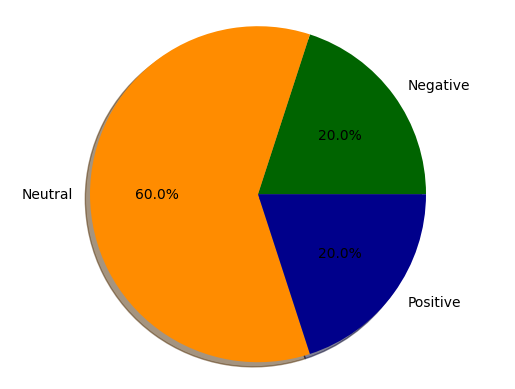

In [ ]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each review
for review in reviews:
    sentiment = TextBlob(review)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["darkgreen","darkorange","darkblue"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.show()

## Clustering Text

### Data Preprocessing

In [ ]:
import pandas as pd

#Load course hashtags
hashtags_df=pd.read_csv("https://raw.githubusercontent.com/dearbharat/datasets/main/Course-Hashtags.csv")
print("\nSample hashtag data :")
print(hashtags_df[:2])

#Separate Hashtags and titles to lists
hash_list = hashtags_df["HashTags"].tolist()
title_list = hashtags_df["Course"].tolist()

#Do TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
hash_matrix=vectorizer.fit_transform(hash_list)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())


Sample hashtag data :
                            Course                             HashTags
0  Apache Spark Essential Training  BigData,DataScience,MachineLearning
1           Java Memory Management            Java,Advanced,Programming

 Feature names Identified :

['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### K-Means Clustering

Clustering TF-IDF (Term Frequency -  Inverse Document Frequency)

In [ ]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=3).fit(hash_matrix)

#get Cluster labels.
clusters=kmeans.labels_

#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    for i in hashtags_df.index:
        if ( clusters[i] == group):
            print(title_list[i])


Group :  0 
-------------------
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group :  1 
-------------------
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting

Group :  2 
-------------------
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science


### Optimal Cluster Size

Using Elbow Method

Sum of squared distances :  [11.433022387031059, 9.055813116540266, 6.761066172191217, 5.821628323788306, 4.988610570351491, 4.11101805980707, 3.3481406712109574, 2.866809118227087, 2.3379688160823213, 1.807779789051295, 1.3264482360674252, 0.8457910455266849, 0.4016418128746414, 5.551115123125783e-16]


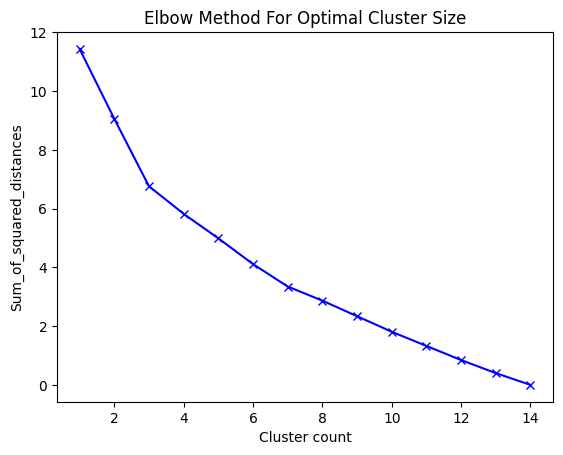

In [ ]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)
    
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

## Classifying Text

### Lemmatization

In [ ]:
#Read course descriptions
with open("data/course-descriptions.txt", 'r') as fh:  
    descriptions = fh.read().splitlines()
print("Sample course descriptions :", descriptions[:2])

#Setup stopwords
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords

#setup wordnet for lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Sample course descriptions : ['In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. ', 'PHP is the most popular server-side language used to build dynamic websites, and though it is not especially difficult to use, nonprogrammers often find it intimidating. ']
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Tokenization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Custom tokenizer that will perform tokenization, stopword removal
#and lemmatization
def customtokenize(str):
    tokens=nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

#Generate TFIDF matrix
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
tfidf=vectorizer.fit_transform(descriptions)

print("\nSample feature names identified : ", vectorizer.get_feature_names()[:25])
print("\nSize of TFIDF matrix : ",tfidf.shape)


Sample feature names identified :  ["'ll", "'re", "'s", '(', ')', ',', '.', '?', 'actively', 'adopting', 'amazon', 'analysis', 'analytics', 'application', 'applied', 'architect', 'architecture', 'around', 'aspect', 'associate', 'aws', 'basic', 'become', 'begin', 'big']

Size of TFIDF matrix :  (20, 238)


### Naive Bayes Classifier

In [ ]:
#Loading the pre-built classifications for training
! wget https://raw.githubusercontent.com/dearbharat/datasets/main/Course-Classification.txt -O ./data/course-classification.txt

with open("data/course-classification.txt", 'r') as fh:  
    classifications = fh.read().splitlines()

#Create Labels and integer classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(classifications)
print("Classes found : ", le.classes_)

#Convert classes to integers for use with ML
int_classes = le.transform(classifications)
print("\nClasses converted to integers :", int_classes)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#Split as training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(tfidf, int_classes,random_state=0)

#Build the model
classifier= MultinomialNB().fit(xtrain, ytrain)


--2023-02-23 01:15:25--  https://raw.githubusercontent.com/dearbharat/datasets/main/Course-Classification.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268 [text/plain]
Saving to: ‘./data/course-classification.txt’

./data/course-class 100%[===================>]     268  --.-KB/s    in 0s      

2023-02-23 01:15:25 (36.7 MB/s) - ‘./data/course-classification.txt’ saved [268/268]

Classes found :  ['Cloud-Computing' 'Data-Science' 'Programming']

Classes converted to integers : [1 2 2 0 1 2 1 2 0 1 1 2 2 0 2 0 0 0 2 2]


### Predicting Classes

In [ ]:
from sklearn import metrics

print("Testing with Test Data :\n------------------------")
#Predict on test data
predictions=classifier.predict(xtest)
print("Confusion Matrix : ")
print(metrics.confusion_matrix(ytest, predictions))
print("\n Prediction Accuracy : ",  \
      metrics.accuracy_score(ytest, predictions) )

print("\nTesting with Full Corpus :\n--------------------------")
#Predict on entire corpus data
predictions=classifier.predict(tfidf)
print("Confusion Matrix : ")
print(metrics.confusion_matrix(int_classes, predictions))
print("\n Prediction Accuracy : ",  \
      metrics.accuracy_score(int_classes, predictions) )

Testing with Test Data :
------------------------
Confusion Matrix : 
[[1 0 0]
 [0 0 1]
 [1 0 2]]

 Prediction Accuracy :  0.6

Testing with Full Corpus :
--------------------------
Confusion Matrix : 
[[6 0 0]
 [0 4 1]
 [1 0 8]]

 Prediction Accuracy :  0.9


## Predicting Next Word

### Preprocessing Data

In [ ]:
import os
#Read course description file
base_file = open("data/course-descriptions.txt", 'rt')
raw_text = base_file.read()
base_file.close()
print("Text read from file : ",raw_text[:200])

#tokenization
import nltk
token_list = nltk.word_tokenize(raw_text)

#Replace special characters
token_list2 = [word.replace("'", "") for word in token_list ]

#Remove punctuations
token_list3 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list2))

#Convert to lower case
token_list4=[word.lower() for word in token_list3 ]

print("\nSample token list : ", token_list4[:10])
print("\nTotal Tokens : ",len(token_list4))

Text read from file :  In this practical, hands-on course, learn how to do data preparation, data munging, data visualization, and predictive analytics. 
PHP is the most popular server-side language used to build dynamic we

Sample token list :  ['in', 'this', 'practical', 'hands-on', 'course', 'learn', 'how', 'to', 'do', 'data']

Total Tokens :  576


### Nuilding n-gram database

In [ ]:
from nltk.util import ngrams

#Use a sqlite database to store ngrams information
import sqlite3
conn = sqlite3.connect(":memory:")

#table to store first word, second word and count of occurance
conn.execute('''DROP TABLE IF EXISTS NGRAMS''')
conn.execute('''CREATE TABLE NGRAMS 
         (FIRST   TEXT  NOT NULL,
          SECOND  TEXT  NOT NULL,
          COUNTS  INT   NOT NULL,
         CONSTRAINT PK_GRAMS PRIMARY KEY (FIRST,SECOND));''')

#Generate bigrams
bigrams = ngrams(token_list4,2)

#Store bigrams in DB
for i in bigrams:
    insert_str="INSERT INTO NGRAMS (FIRST,SECOND,COUNTS) \
          VALUES ('" + i[0] + "','" + i[1] + "',1 ) \
          ON CONFLICT(FIRST,SECOND) DO UPDATE SET COUNTS=COUNTS + 1"   
    conn.execute(insert_str);

#Look at sample data from the table
cursor = conn.execute("SELECT FIRST, SECOND, COUNTS from NGRAMS LIMIT 5")
for gram_row in cursor:
    print("FIRST=", gram_row[0], "SECOND=",gram_row[1],"COUNT=",gram_row[2])

FIRST= in SECOND= this COUNT= 2
FIRST= this SECOND= practical COUNT= 1
FIRST= practical SECOND= hands-on COUNT= 1
FIRST= hands-on SECOND= course COUNT= 1
FIRST= course SECOND= learn COUNT= 1


### Recommending Next Word

In [ ]:
#Function to query DB and find next word
def recommend(str):
    nextwords = []
    #Find next words, sort them by most occurance
    cur_filter = conn.execute("SELECT SECOND from NGRAMS \
                              WHERE FIRST='" + str + "' \
                              ORDER BY COUNTS DESC")
    
    #Build a list ordered from most frequent to least frequent next word
    for filt_row in cur_filter:
        nextwords.append(filt_row[0])
    return nextwords

#Recommend for words data and science
print("Next word for data ", recommend("data"))
print("\nNext word for science ", recommend("science"))

Next word for data  ['science', 'analysis', 'data', 'from', 'in', 'mining', 'munging', 'node.js', 'preparation', 'scientists', 'visualization', 'you']

Next word for science  ['begins', 'requires', 'specialists', 'teams']


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c633c656-abbc-4122-8847-d0df1a741540' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>